# Chapter 2 (Hands-On Machine Learning with Scikit-Learn and TensorFlow)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Housing Price Prediction

Here we automate the process of fetching data.

In [1]:
import os
import tarfile
from six.moves import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join ("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        #it creates a folder in our workspace
        os.makedirs(housing_path)
    tgz_path = os.path.join (housing_path, "housing.tgz")
    #urlretrieve gets the data and copies in the local path, i.e. in the path "tgz_path"
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

Here we get the CSV data:

In [3]:
import pandas as pd

def load_housing_data(file_name, housing_path = HOUSING_PATH):
    csv_path = os.path.join (housing_path, file_name)
    return pd.read_csv(csv_path)

In [4]:
data = load_housing_data("housing.csv")
data.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


info() gives a quick description of the data:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20640 rows in the dataset. A couple of instances of table are missing the values for total_bedrooms.

In [6]:
data["ocean_proximity"].value_counts() # gives me counts the different values in this column

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Here we can see a numerical summary of attributes in our table. The null values are ignored in these calculations.

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now, lets histograms to understand our data further.

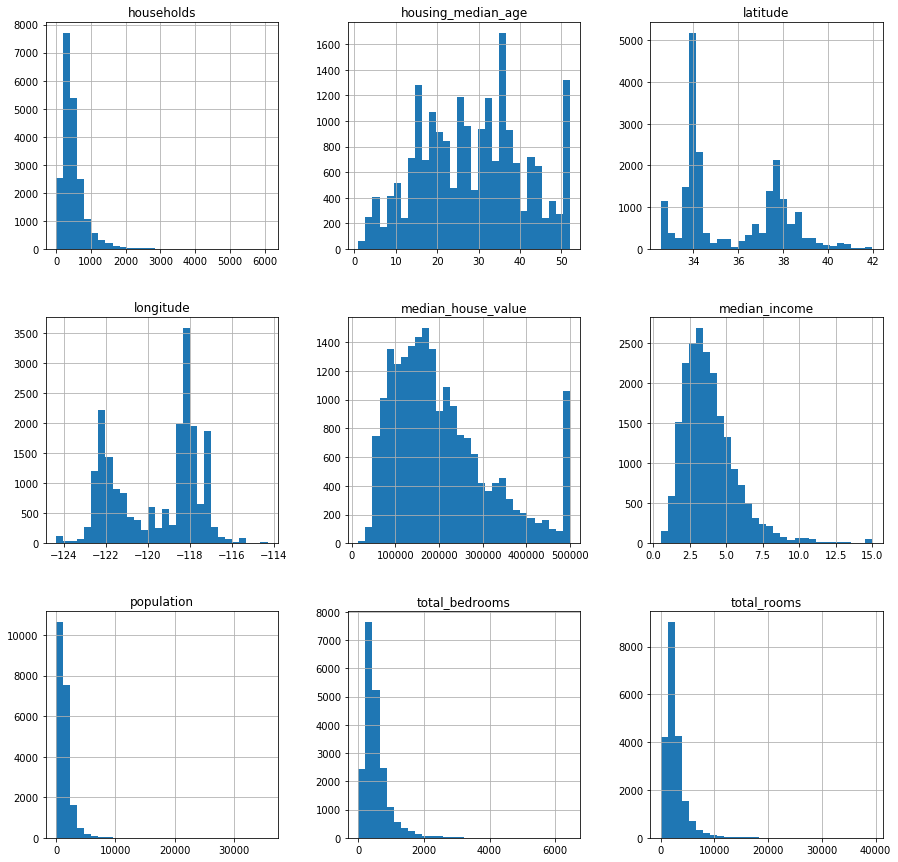

In [8]:
# prepares matplot for Jupter notebook and only is used in Jupyter
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins = 30, figsize=(15, 15))
plt.show()

## Splitting the data into test and train sets

Here we make a data set

In [9]:
import numpy as np

def split_train_test (data, test_ratio):
    shuffled_indices = np.random.permutation (len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices [:test_set_size]
    train_indices = shuffled_indices [test_set_size:]
    return data.iloc [train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test (data, 0.2)
print ("We have", len (train_set), "train +", len (test_set), "test") 

We have 16512 train + 4128 test


Here we make a stable procedure to split the data into train and test data

In [10]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    #it retrieves the last byte of hash(identifier) and checks if its less than 2^8 * ratio
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply (lambda id_ : test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc [in_test_set]

In [11]:
data_with_id = data.reset_index()

In [12]:
data_with_id.head(10)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [13]:
train_set, test_set = split_train_test_by_id (data_with_id, 0.2, "index")

In [14]:
data_with_id["id"] = data["longitude"] * 1000+ data["latitude"]
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "id")

Scikit-Learn provides functions to split train and test data. You can set random_state a fix number to receieve the same subset as the training and test datasets. You can also pass multiple datasets to this function. This function will split with same indices as their row numbers.

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (data, test_size = 0.2, random_state = 42)

inplace is False by default. We need to set it True if we are going to actually change the data.
The function "where" keeps values data ["income_cat"] if they are < 5.0; otherwise, they will be set to 5.0.

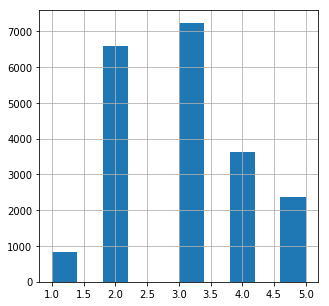

In [16]:
data ["income_cat"] = np.ceil(data ["median_income"] / 1.5)
data ["income_cat"].where(data ["income_cat"] < 5, 5.0, inplace = True)
data.head(10)
data ["income_cat"].hist(bins=10, figsize=(5,5))
data
plt.show()

We can split the dataset into training and test using stratified sampling, which shows a better sense of our actual data. We do this to avoid having skewed data.

In [17]:
import math
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split (data, data["income_cat"]):
    strat_train_set = data.loc [train_index]
    strat_test_set = data.loc [test_index]

Lets check if the stratified sampling works well according to the previous plot.

In [18]:
strat_test_set ["income_cat"].value_counts() / len (strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [19]:
strat_train_set ["income_cat"].value_counts() / len (strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

We used "income_cat" to sample the data. Lets remove it for now so the data is back to its original state.
## Visualization

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [21]:
housing = strat_train_set.copy()

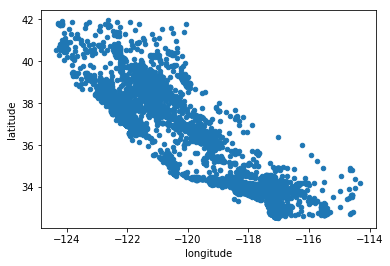

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Set $\alpha = 0.1$ makes it much easier to visualize the places where the density of data points is high

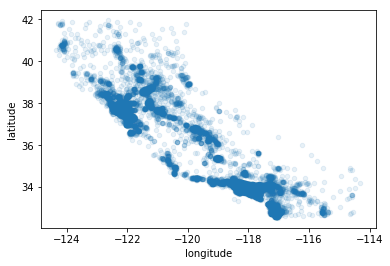

In [23]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1)

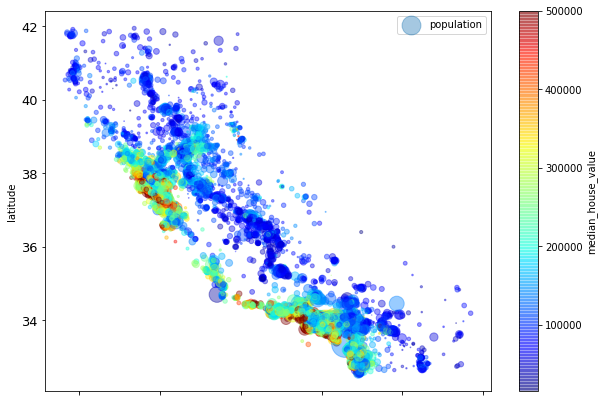

In [24]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha=0.4,
            s = housing ["population"] / 50, label = "population", figsize = (10, 7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True, fontsize=13
        )
plt.legend()

Here we want to compute __standard correlation coefficient__ (also is called **Pearson's $r$**). The correlation coefficient ranegs from $-1$ to $+1$. When, it is close to $1$, it means that there is a strong positive correlation. For example, the median house value tends to go up when the median income also goes up. 

If the correlation is close to $0$, it means that possibly there is no __linear correlation__ between two entities.

In [25]:
corr_matrix = housing.corr() #computes **linear correlation** and is used when the data is not so large
corr_matrix ["median_house_value"].sort_values (ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to usa __scatter_matrix__ of __panda__, which plots every _numerical_ attributes against every other numberical attribute. Lets show a couple of these plots



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175427E1D68>,
      dtype=object)

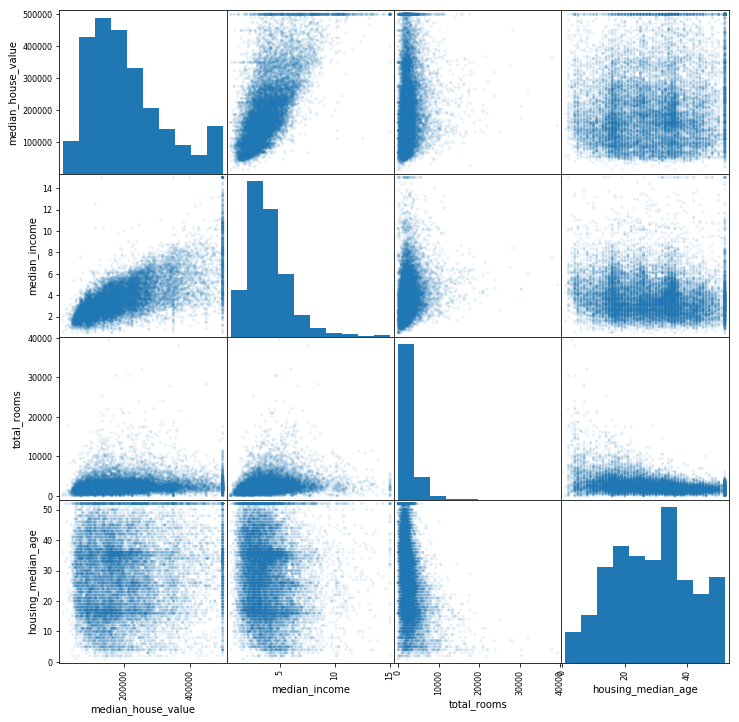

In [26]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age'] 
scatter_matrix(housing[attributes], figsize=(12, 12), alpha = 0.1)

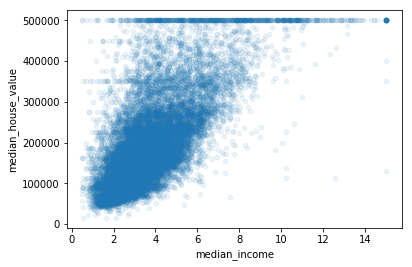

In [27]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.08)

In [28]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing ['population'] / housing['households']

In [29]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [30]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Use __Imputer__ to replace every NA cell in a column with a strategy method such as __'median'__

In [81]:
from sklearn.preprocessing import Imputer
imputer = Imputer (strategy='median')

Since the __median__ can only be computed on numerical values, we need to drop attributes containing texts.

In [33]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
imputer.strategy

'median'

In [36]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

Here, you can use __imputer__ to replace missing values by learned median values.

In [37]:
X = imputer.transform(housing_num)

__X__ is __numpy__. We need to change it to panda dataframe.

In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# Handling Text and Categorical Attributes

In [39]:
housing_cat = housing.ocean_proximity
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

Here we map texts to integers using __factorize()__

In [40]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [41]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

One idea to handle text cells is to use one hot method. In this method, each row will have exactly one __1__ in a row and others will be __0__ for ocean proximity. We need to have __housing.ocean_proximity.countvalues()__ more columns.

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot.toarray()[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

Note that the output is a sparse matrix which is very useful to save memory and speed up the computation. __reshape(-1, 1)__ means the second dimension is __1__ and the first dimension length is determined automatically. Then, __-1__ is used to assist your laziness!

Here you can apply both transformations from text categories to integer categories, and then to one-hot vectors in one shot using __CategoricalEncoder__ class.

In [43]:
from sklearn.preprocessing import CategoricalEncoder
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

If instead of sparse matrix, you need a dense matrix, you could use __onehot-dense__.

In [48]:
cat_encoder = CategoricalEncoder(encoding='onehot-dense')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Even more, you can get the list of categories using **categroies_**. 

In [49]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
encoder.categorical_features

'all'

# Custom Transformers

Here we are going to implement our own transformer with a class and three methods: __fit()__, __transform()__, and __fit_transform()__.

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin
from prettytable import PrettyTable
room_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def __init__ (self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit (self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, room_ix] / X[:, household_ix]
        population_per_household = X[:, room_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room is True:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
tab = PrettyTable(housing_extra_attribs.dtype.names)
for row in housing_extra_attribs:
    tab.add_row(row)
#print(tab) it generates a very long table

# Feature Scaling: min-max scaling and standardization

## min-max scaling (normalization)

In this way, values are shifted and rescaled so they end up ranging from __0__ to __1__. We can use __MinMaxScaler__ from __Scikit-Learn__ and __feature_range__ so that values are scaled in specific ranges. For every value $v$, we change $v$ to $\frac{v - \min}{\max - \min}$

## Standardization

This method is quite different. First we subctracts the mean value and then it divides by the variance. Unlike, min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms. However, min-max scaling is much less affected by outliers. We can use __standardScaler__ from __Scikit-Learn__ for standiardization.

## Transformation Pipelines

We can use data transformation in different steps using Pipeline to speed up the process. __Scikit-Learn__ has provided us with such facility: all but last estimator must have __fit_transform()__ meaning they should be __transformers__.

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

It would be good if we can feed a Panda DataFrame containing even non-numberical columns directly to our pipeline, instead of having to manually extract the numberical columns into a NumPy array. Scikit-Learn does not handle Panda does. Therefore, we can write a custom transformer for this task:

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit (self, X, y = None):
        return self # do nothing
    def transform(self, X):
        return X[self.attributes_names].values # change it to NumPy

**DataFrameSelector** will transform the data be selecting the desired attributes, dropping the rest, and converting the resulting __DataFrame__ to __NumPy__ array. We can write two pipelines for numerical and categorical attributes.

In [86]:
from sklearn.preprocessing import CategoricalEncoder
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline(
 [
     ('selector', DataFrameSelector(num_attribs)),
     ('imputer', Imputer(strategy = 'median')),
     ('attribs_adder', CombinedAttributesAdder()),
     ('std_scalar', StandardScaler()),
 ]   
)
cat_pipeline = Pipeline(
    [
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding='onehot-dense')),
    ]
)

But, the question arises here and is that how we can join these two pipelines into a single pipeline?

In [87]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion (transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

Now, we can run the whole pipeline simply:

In [95]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Train a Model

Now lets train our model.

In [98]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:', lin_reg.predict(some_data_prepared))
print('labels:', list(some_labels))

predictions: [210528.01750105 317824.00920324 210815.82440675  59307.5245779
 189946.78983305]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


We can also measure __RMSE__ on the whole training set using Scikit-Learn's **mean_squared_error**

In [102]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68635.59352516982

In [103]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [104]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This is because we trained all the input data and we use the test data out of the training data. A better evaluation is to use **Cross Validation**. **Cross Validation Function** assumes that the greater is better. Therefore, we use **negative MSE** to consider less error predictions as better preditions.

In [105]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('scores:', scores)
    print('Mean:', scores.mean())
    print('standard deviation', scores.std())

display_scores(tree_rmse_scores)

scores: [70230.60049094 64930.20678161 72842.11383083 70269.19765696
 70102.25194475 74732.10160366 70534.28320504 71144.36827359
 69472.52135152 68218.41566539]
Mean: 70247.6060804285
standard deviation 2464.620160616777
